In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.interpolate as spi
import numpy as np
import math

import numpy as np
from scipy.interpolate import interp1d
from math import sqrt  # for square root calculation
import decimal  # for higher precision calculations

In [67]:
ans = pd.read_csv("anscombe.csv")

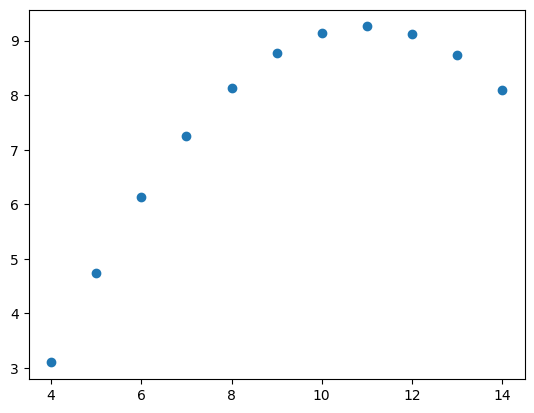

In [68]:
plt.plot(ans[ans.group == "II"].x,ans[ans.group == "II"].y,'o')

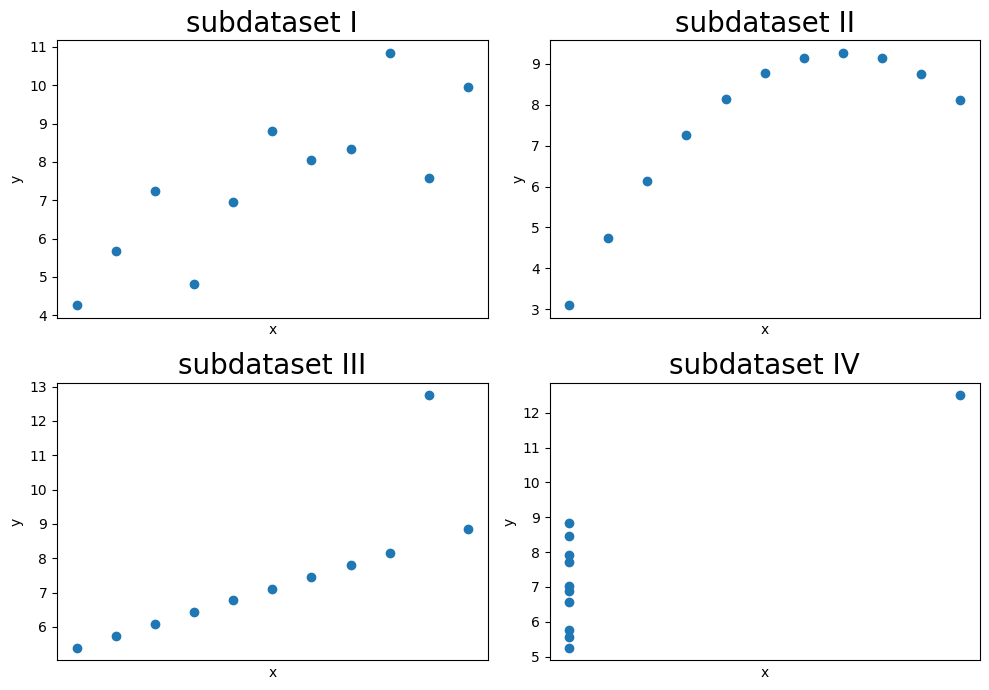

In [69]:

fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Iterate over each group and plot on respective subplot
for i, group in enumerate(["I", "II", "III", "IV"]):
    x = ans[ans.group == group]["x"].values
    y = ans[ans.group == group]["y"].values
    x = x - x.mean()
    ax = axes[i // 2, i % 2]
    ax.scatter(x, y)
    ax.set_title(f"subdataset {group}", fontsize=20)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_xticks([])  # Hide x ticks

plt.tight_layout()
plt.show()


In [70]:
# Function to calculate Root Mean Squared Error (RMSE) with higher precision
def RMSE(y_actual, y_predicted):
    """Calculates the Root Mean Squared Error between actual and predicted values."""
    mse = decimal.Decimal("0.0")
    for i in range(len(y_actual)):
        mse += (decimal.Decimal(y_actual[i]) - decimal.Decimal(y_predicted[i]))**2
    mse /= len(y_actual)
    return sqrt(float(mse))  # Convert back to float for printing

In [71]:
ans = pd.read_csv('anscombe.csv')
x = np.sort(ans[ans.group == 'II']['x'].values)
y= np.sort(ans[ans.group == 'II']['y'].values)

In [72]:
print("y", y)

y [3.1  4.74 6.13 7.26 8.1  8.14 8.74 8.77 9.13 9.14 9.26]


In [73]:
print("x",x)

x [ 4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [74]:
# Approximation via interpolation
f_interp = interp1d(x, y, kind='cubic')  # Try different interpolation methods
y_interp = f_interp(x)  # Predicted y-values using interpolation

In [75]:
f_interp_linear = interp1d(x, y, kind='linear')  # Try linear interpolation
y_interp_linear = f_interp_linear(x)

In [79]:
# Approximation via interpolation (try different methods)
f_interp_cubic = interp1d(x, y, kind='cubic')  # Keep cubic for reference
y_interp_cubic = f_interp_cubic(x)  # Predicted y-values using cubic interpolation

In [76]:
print("f_interp",f_interp)

f_interp <scipy.interpolate._interpolate.interp1d object at 0x7a94291fcea0>


In [77]:
print("y_interp",y_interp)

y_interp [3.1  4.74 6.13 7.26 8.1  8.14 8.74 8.77 9.13 9.14 9.26]


# Approxmimation via interpolation

In [80]:
# Calculate RMSE for Interpolation (cubic and linear)
rmse_interp_cubic = RMSE(y, y_interp_cubic)
rmse_interp_linear = RMSE(y, y_interp_linear)
print("RMSE for Interpolation (Cubic):", rmse_interp_cubic)
print("RMSE for Interpolation (Linear):", rmse_interp_linear)


RMSE for Interpolation (Cubic): 5.988097684046441e-16
RMSE for Interpolation (Linear): 0.0


In [82]:
# Approximation via Least Squares
def least_squares(x, y):
  """
  Performs least squares approximation and returns the coefficients of the fitted polynomial.
  """
  A = np.vstack([x**i for i in range(2)]).T  # Design matrix for linear or quadratic fit
  m, c = np.linalg.lstsq(A, y, rcond=None)[0]  # Solve for coefficients
  return m, c  # Return slope (m) and intercept (c)

# Fit a linear or quadratic polynomial (adjust the degree in np.vstack)
m, c = least_squares(x, y)
y_least_squares = m * x + c  # Predicted y-values using least squares

# Approximation via Least square

In [83]:

rmse_interp_cubic = RMSE(y, y_interp_cubic)
rmse_interp_linear = RMSE(y, y_interp_linear)

# Calculate RMSE for Least Squares
rmse_least_squares = RMSE(y, y_least_squares)

# Print RMSE values
print("RMSE for Interpolation (Cubic):", rmse_interp_cubic)
print("RMSE for Interpolation (Linear):", rmse_interp_linear)
print("RMSE for Least Squares:", rmse_least_squares)


RMSE for Interpolation (Cubic): 5.988097684046441e-16
RMSE for Interpolation (Linear): 0.0
RMSE for Least Squares: 16.79452681408706


# Comparison and conlusion